In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

excel = pd.read_excel("ris.xlsx")
excel.columns = ['SEED', 'SEQ_LEN', 'DATASET', 'METHOD', 'THRESHOLD', 'True-f1',
       'weighted-f1', 'accuracy', 'true_recall', 'true_precision',
       'weighted_recall', 'weighted_precision', 'epoch_time']

lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]

In [3]:
means_seed = excel.groupby(['DATASET','METHOD','SEQ_LEN','THRESHOLD']).mean().reset_index()

In [10]:
import pandasql as ps
q = """SELECT "DATASET","METHOD", "SEQ_LEN" ,MAX("True-f1") AS MAX_PRECISION, "THRESHOLD" 
       FROM means_seed
       GROUP BY "DATASET","METHOD" """

max_df = ps.sqldf(q)
q2 = """
    SELECT DATASET, METHOD, SEQ_LEN, COUNT(SEQ_LEN)
    FROM max_df 
    GROUP BY "DATASET", "SEQ_LEN"

     """
ps.sqldf(q2)

,DATASET,METHOD,SEQ_LEN,COUNT(SEQ_LEN)
0,MSL,TANOGAN,30,3
1,MSL,DEEPANT,50,1
2,NAB_AD,DEEPANT,100,4
3,NAB_TEMP,DEEPANT,30,3
4,NAB_TEMP,USAD,100,1
5,NAB_TRAFFIC,DEEPANT,30,2
6,NAB_TRAFFIC,TANOGAN,50,2
7,SMD,DEEPANT,30,4
8,SWAT,DEEPANT,30,4


- MSL-DEEPANT ha un 0.498 con SEQ_LEN = 30 e 0.509 con SEQ_LEN=50 threshold entrambe a 0.8
- NAB_TEMP-USAD ha un 0.6 con SEQ_LEN=30 e 0.71 con SEQ_LEN=50
- SU NAB_TEMP LE DIFFERENZE SONO MOLTO AMPIE 



In [15]:
d = 'SWAT'
s = 30
data = excel[(excel['METHOD']== m) & (excel['SEQ_LEN']== s) & (excel['DATASET'] == d)]

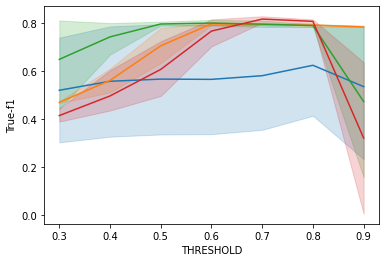

In [17]:
for m in methods:
  data = excel[(excel['METHOD']== m) & (excel['SEQ_LEN']== s) & (excel['DATASET'] == d)]
  sns.lineplot(data=data, x='THRESHOLD', y='True-f1')

In [ ]:
sns.barplot(data=max_f1_df.groupby(['DATASET', 'SEQ_LEN']).count().reset_index(), x='DATASET', y="METHOD", hue="SEQ_LEN")

In [12]:
data

,SEED,SEQ_LEN,DATASET,METHOD,THRESHOLD,True-f1,weighted-f1,accuracy,true_recall,true_precision,weighted_recall,weighted_precision,epoch_time
2149,3,30,SWAT,USAD,0.3,0.526126,0.835240,0.807095,0.865302,0.377971,0.807095,0.902637,1.070357
2150,3,30,SWAT,USAD,0.4,0.715098,0.925804,0.923118,0.779634,0.660429,0.923118,0.929990,1.070357
2151,3,30,SWAT,USAD,0.5,0.813719,0.957602,0.960525,0.696659,0.978064,0.960525,0.961210,1.070357
2152,3,30,SWAT,USAD,0.6,0.802568,0.955518,0.958992,0.673491,0.992851,0.958992,0.960463,1.070357
2153,3,30,SWAT,USAD,0.7,0.803859,0.955844,0.959325,0.673491,0.996810,0.959325,0.960967,1.070357
2154,3,30,SWAT,USAD,0.8,0.797284,0.954489,0.958192,0.664332,0.996766,0.958192,0.959927,1.070357
2155,3,30,SWAT,USAD,0.9,0.787997,0.952612,0.956658,0.650862,0.998347,0.956658,0.958611,1.070357
2170,1,30,SWAT,USAD,0.3,0.797957,0.954346,0.957792,0.673491,0.978857,0.957792,0.958681,1.090835
2171,1,30,SWAT,USAD,0.4,0.797027,0.954424,0.958125,0.664332,0.995961,0.958125,0.959824,1.090835
2172,1,30,SWAT,USAD,0.5,0.793249,0.953673,0.957525,0.658405,0.997551,0.957525,0.959359,1.090835


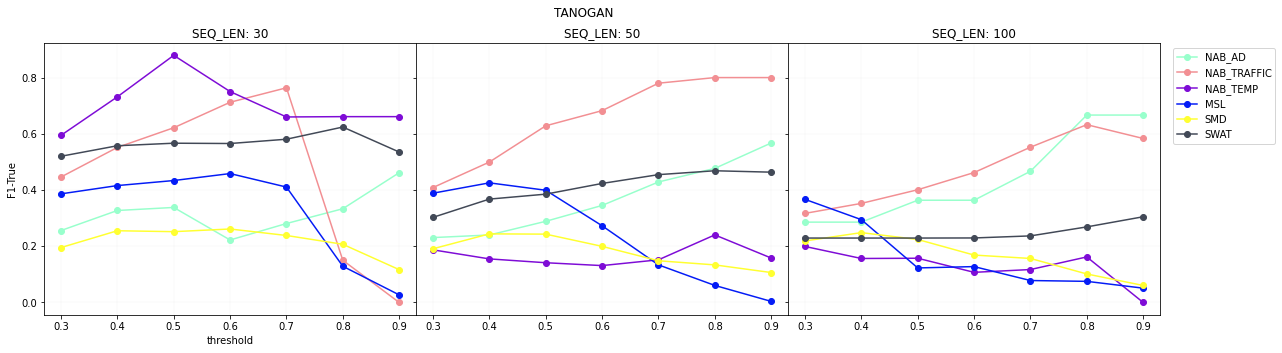

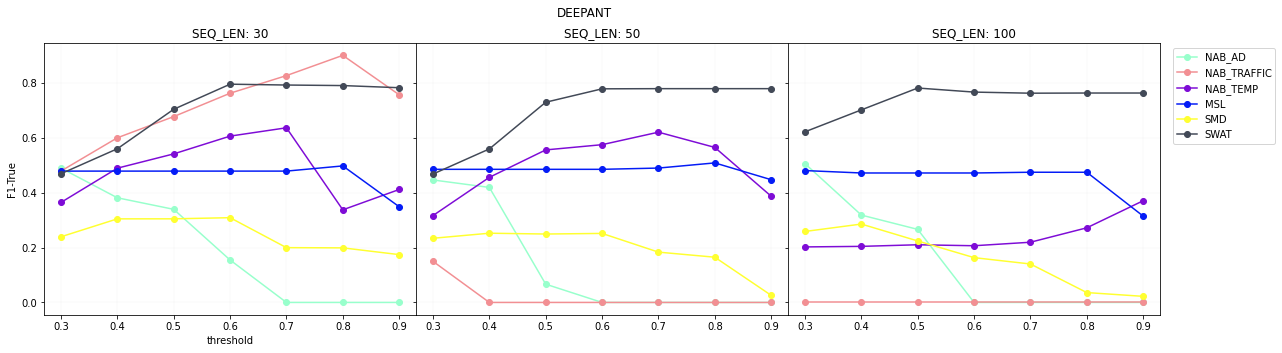

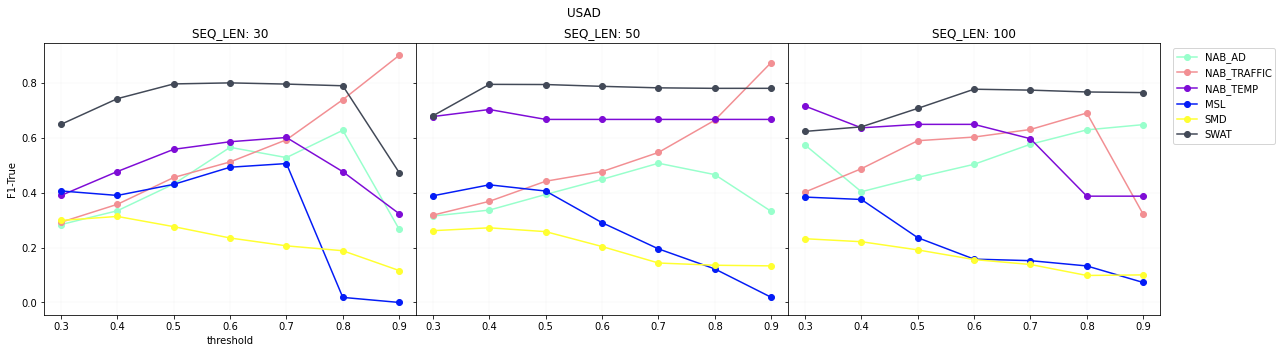

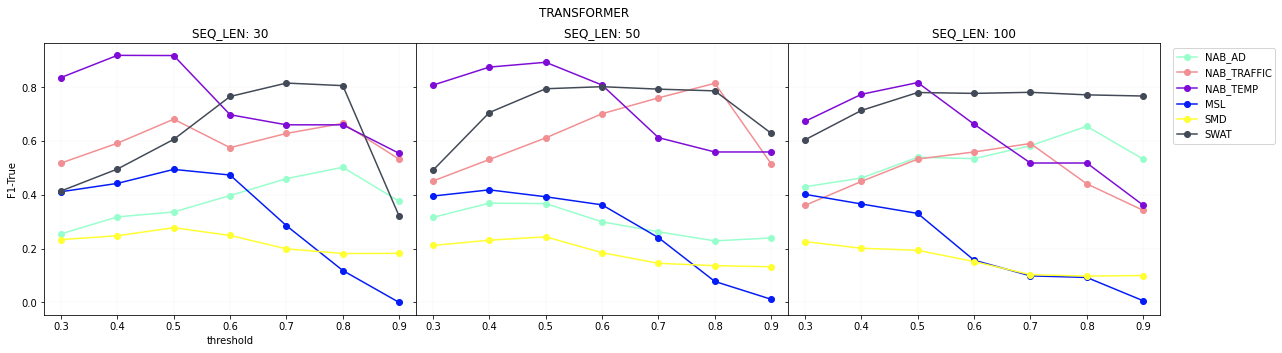

In [ ]:
for m in methods: 
  fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(m)
  
  for i,d in enumerate(datasets): 
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for j,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=d, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("SEQ_LEN: {}".format(l))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")

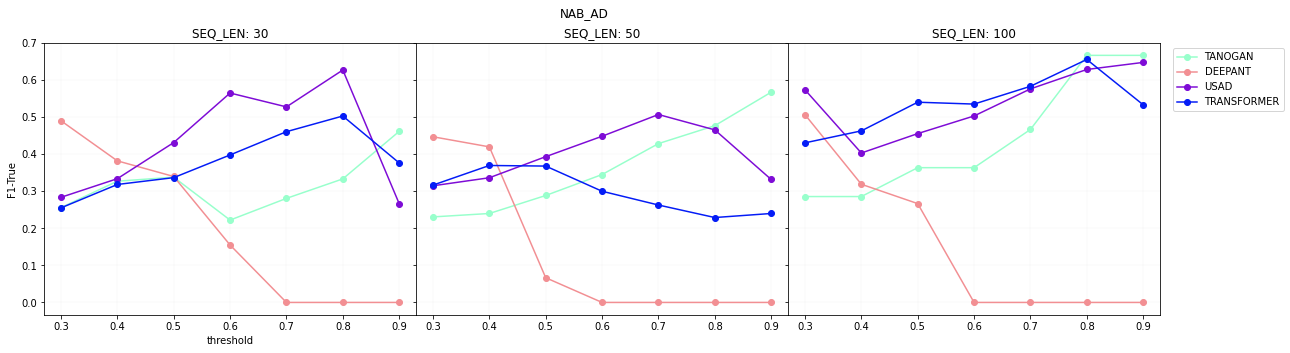

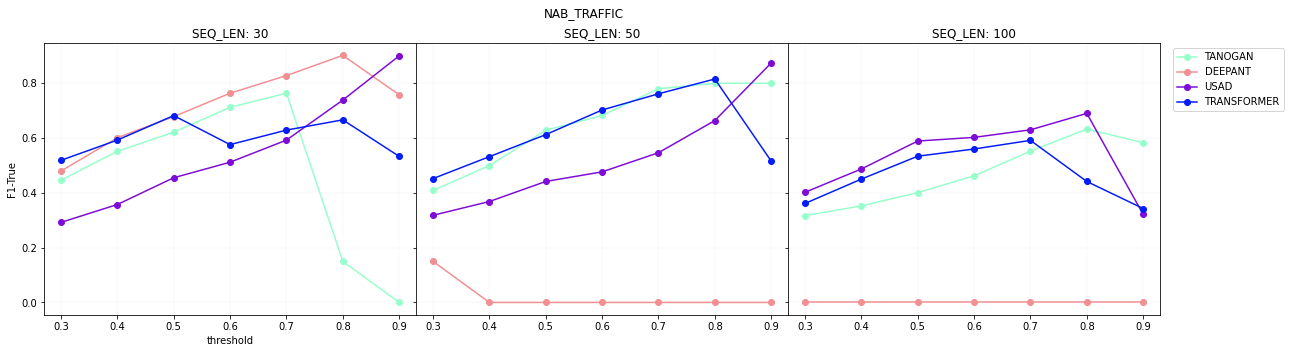

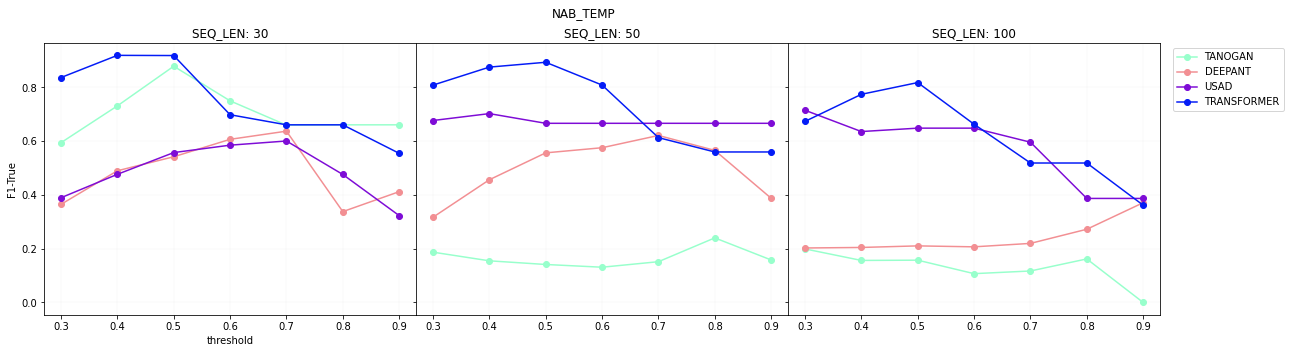

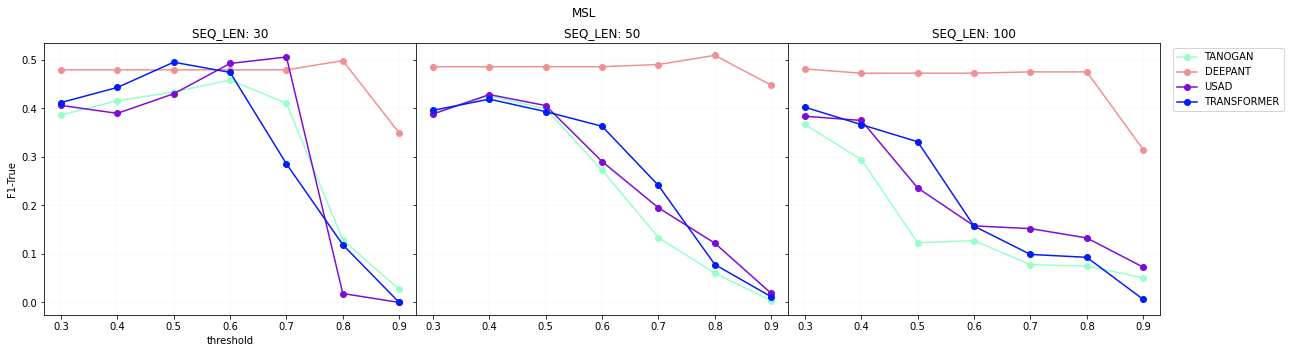

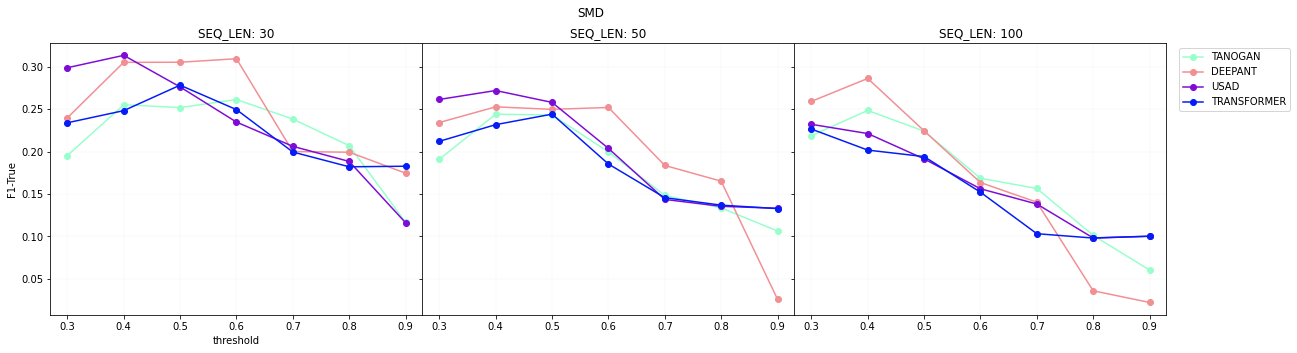

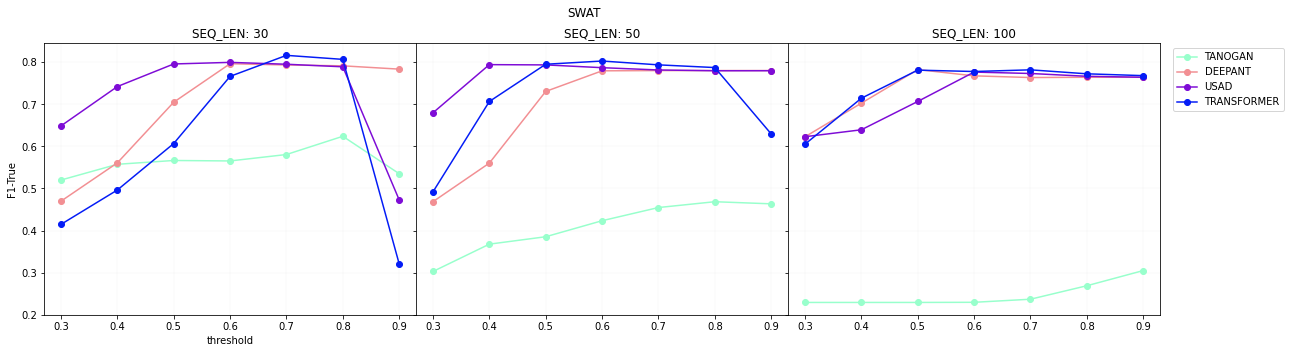

In [ ]:
for d in datasets:
  fig, axs = plt.subplots(1, len(lengths), figsize=(20,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(d)
  for i,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for j,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=m, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("SEQ_LEN: {}".format(l))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")


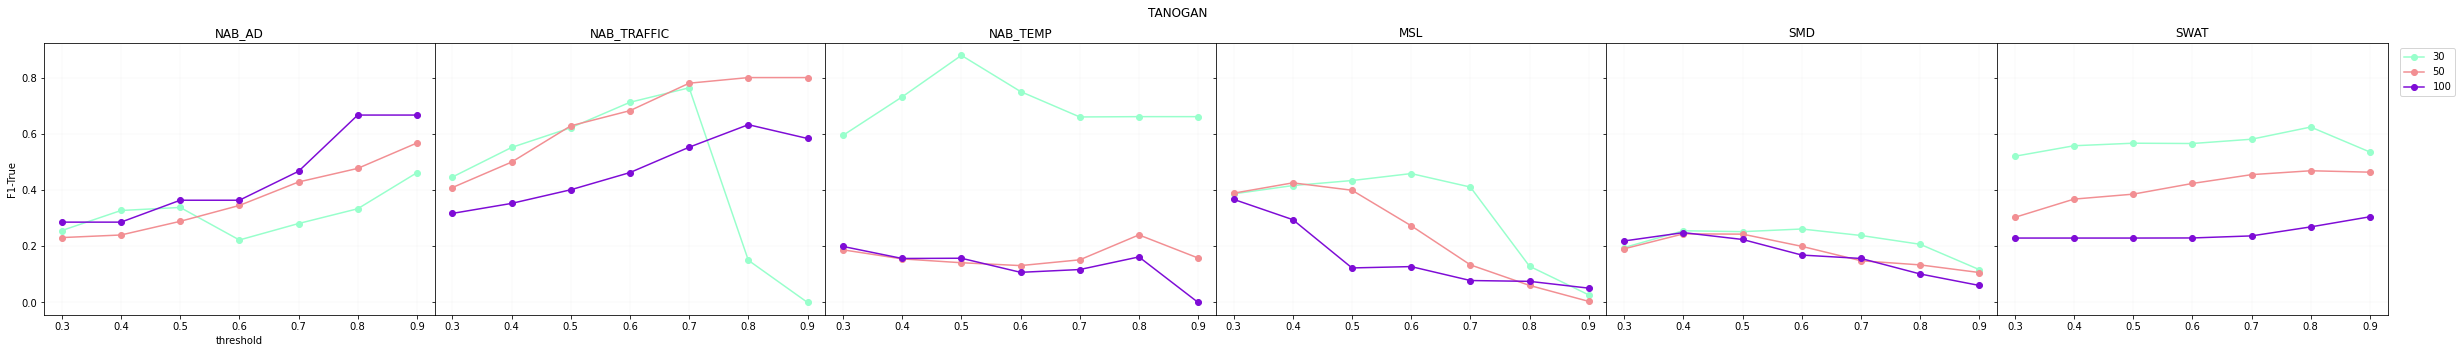

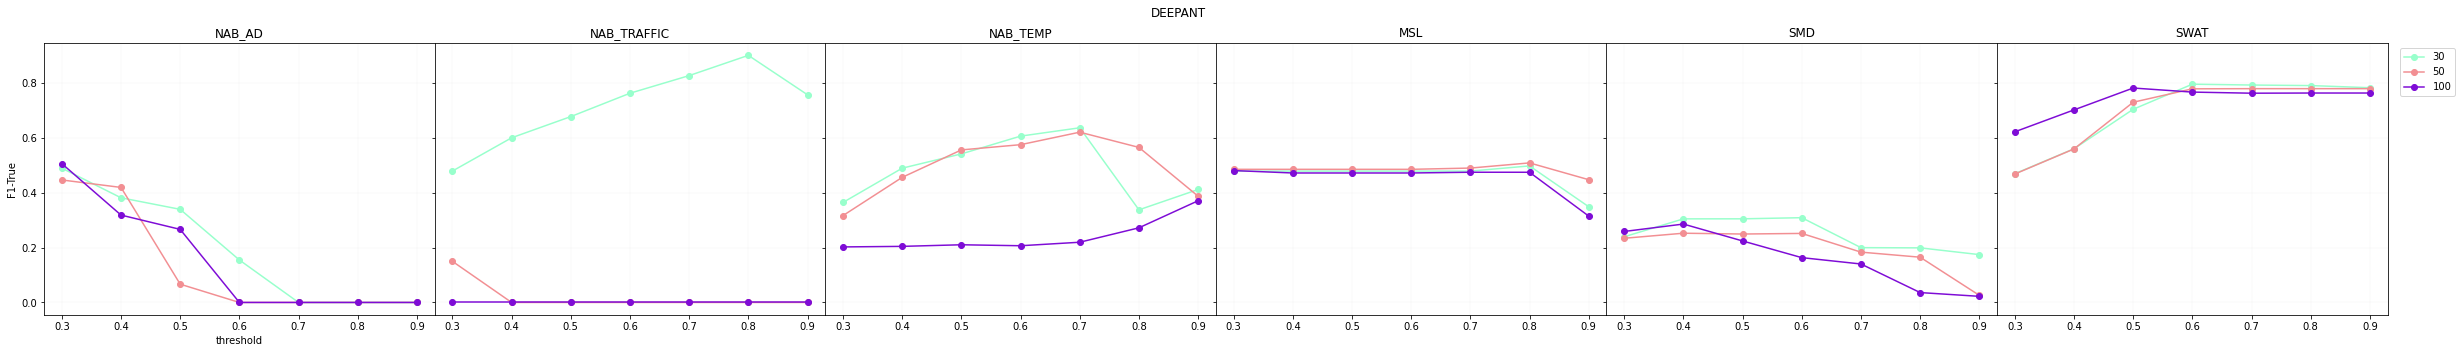

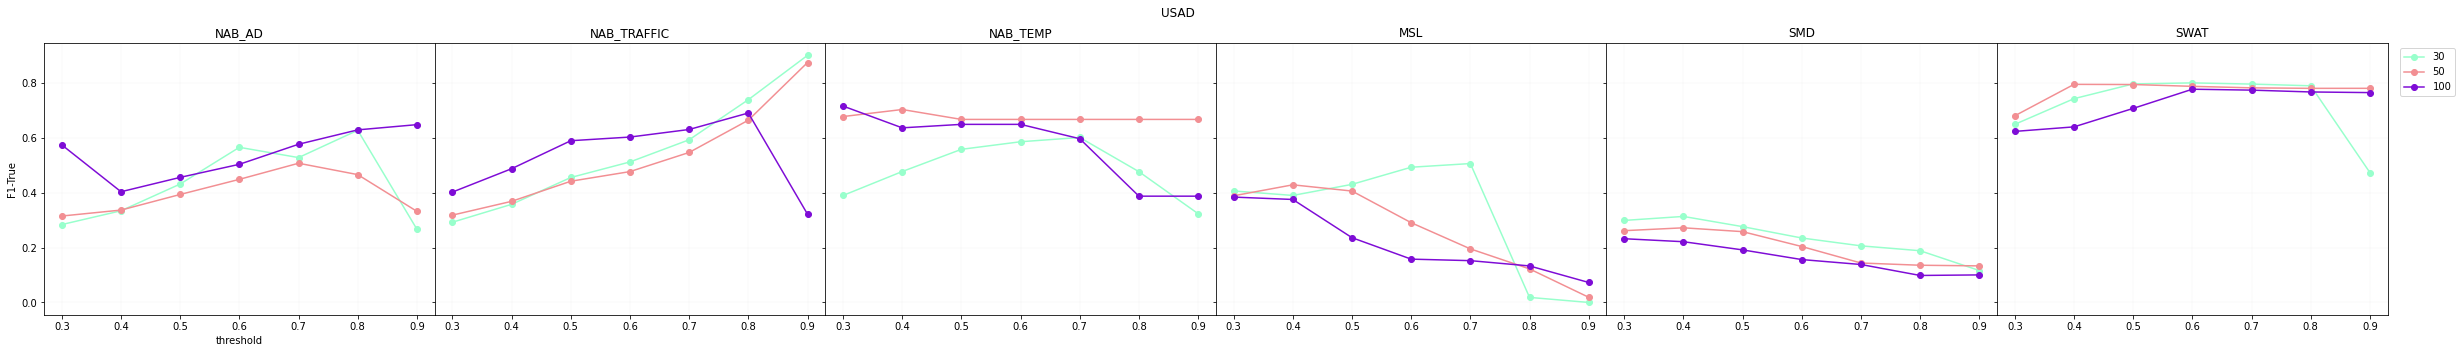

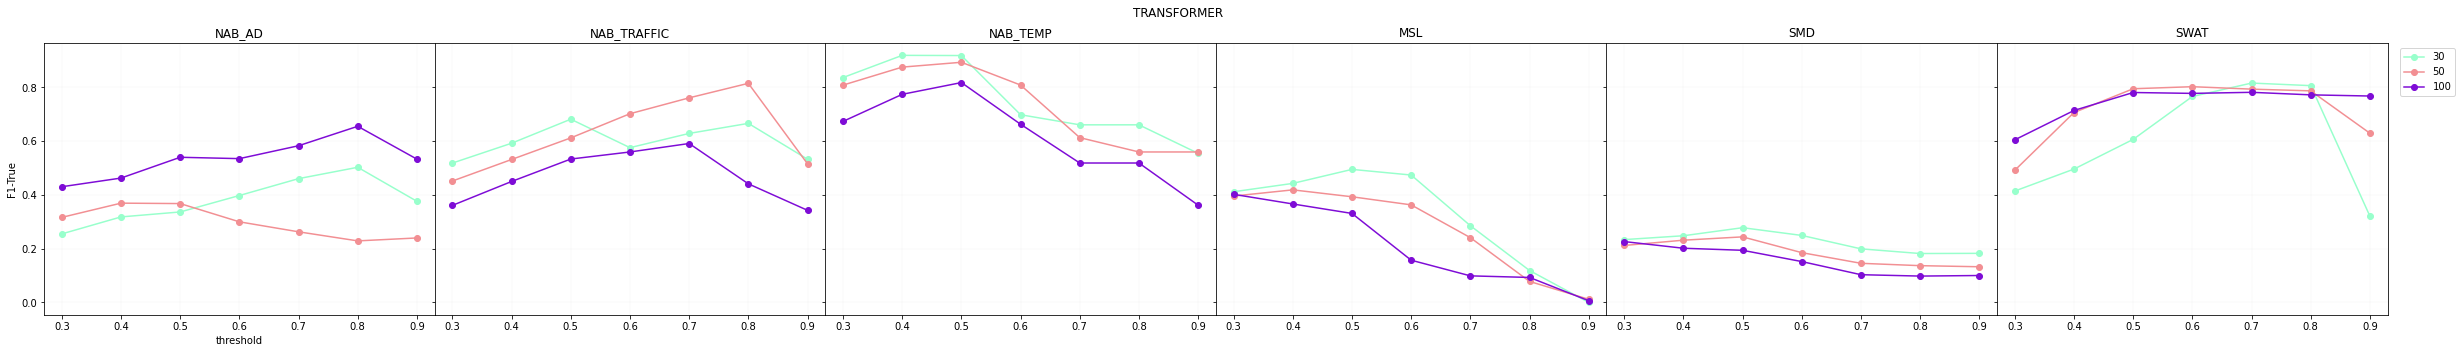

In [ ]:
lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]



for m in methods:
  fig, axs = plt.subplots(1, len(datasets), figsize=(len(datasets)*7,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(m)
  for j,d in enumerate(datasets):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for i,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=l, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("{}".format(d))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")



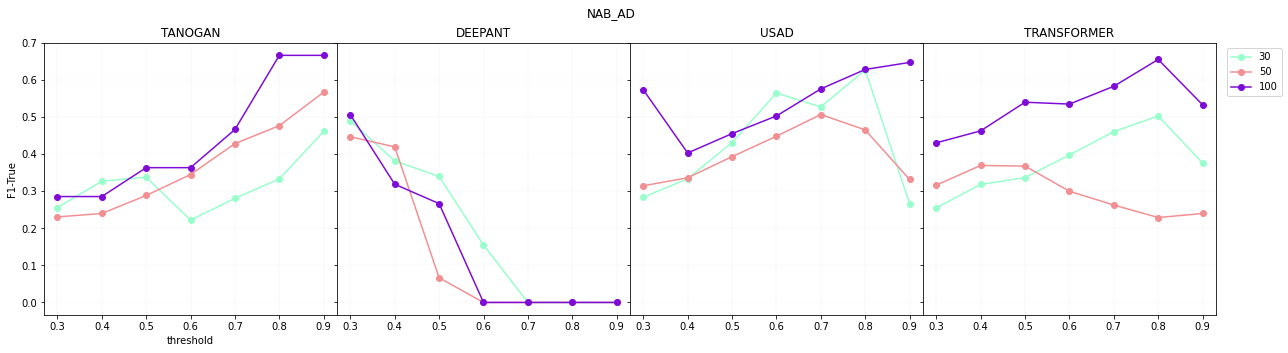

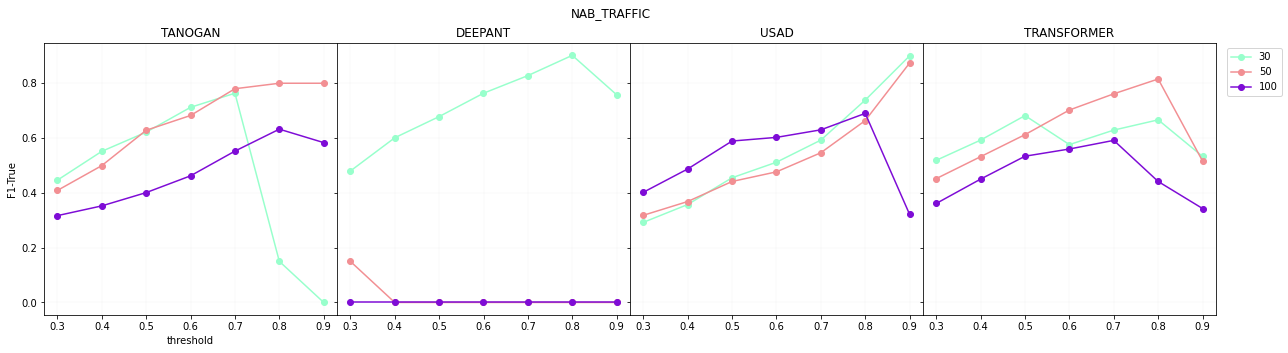

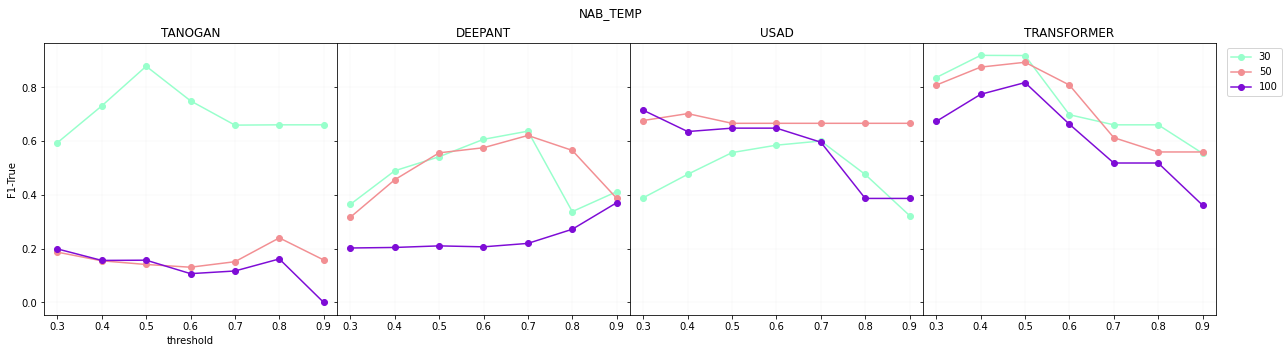

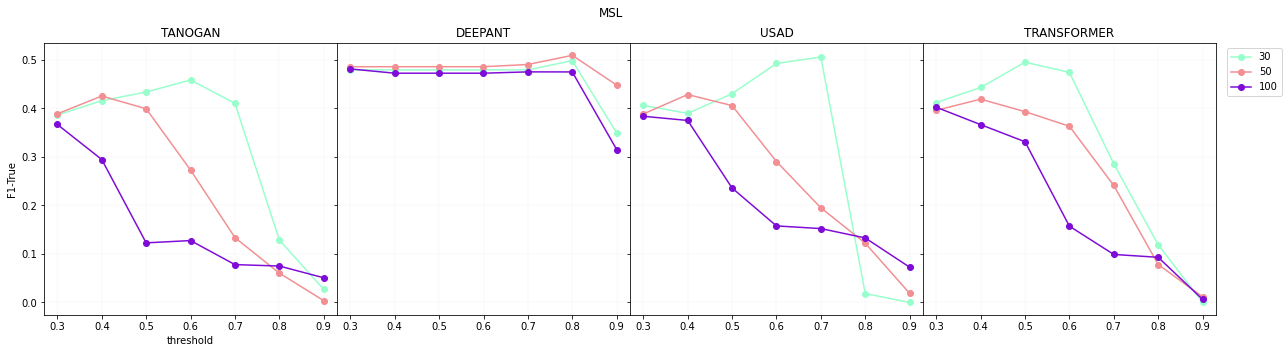

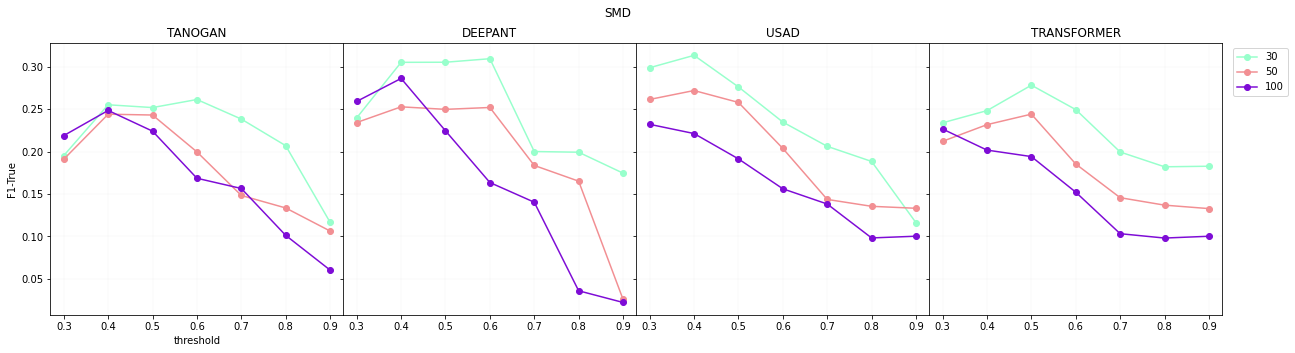

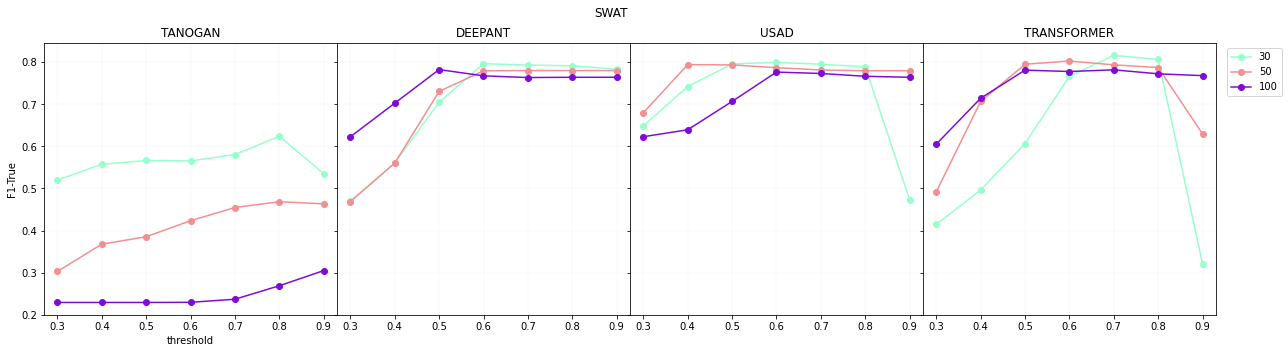

In [ ]:
for d in datasets:
  fig, axs = plt.subplots(1, len(methods), figsize=(len(datasets)*3.5,5), sharey='row', subplot_kw=dict(frameon=True))
  plt.subplots_adjust(wspace=.0)
  fig.suptitle(d)
  for j,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN','THRESHOLD']).mean().reset_index()
    for i,l in enumerate(lengths):
      axs[j].plot(means[means['SEQ_LEN']==l]['THRESHOLD'],
               means[means['SEQ_LEN']==l]['True-f1'],
               label=l, 
               color=colors[i], 
               linestyle=styles[0],
               marker='o')
      axs[j].grid(color='lightgrey', linestyle='-', linewidth=0.1)
      axs[j].set_title("{}".format(m))
      axs[0].set(xlabel="threshold",ylabel="F1-True")
  plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
  plt.show()
  print("\n\n")


In [ ]:
means_seed

,DATASET,METHOD,SEQ_LEN,THRESHOLD,SEED,True-f1,weighted-f1,accuracy,true_recall,true_precision,weighted_recall,weighted_precision,epoch_time
0,MSL,DEEPANT,30,0.3,3.0,0.479355,0.821388,0.789495,0.806780,0.340974,0.789495,0.892313,0.304622
1,MSL,DEEPANT,30,0.4,3.0,0.479355,0.821388,0.789495,0.806780,0.340974,0.789495,0.892313,0.304622
2,MSL,DEEPANT,30,0.5,3.0,0.479355,0.821388,0.789495,0.806780,0.340974,0.789495,0.892313,0.304622
3,MSL,DEEPANT,30,0.6,3.0,0.479355,0.821388,0.789495,0.806780,0.340974,0.789495,0.892313,0.304622
4,MSL,DEEPANT,30,0.7,3.0,0.479355,0.821388,0.789495,0.806780,0.340974,0.789495,0.892313,0.304622
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,SWAT,USAD,100,0.5,3.0,0.706793,0.922835,0.922338,0.672509,0.809181,0.922338,0.933600,1.395835
500,SWAT,USAD,100,0.6,3.0,0.776674,0.947860,0.952301,0.642612,0.984345,0.952301,0.954026,1.395835
501,SWAT,USAD,100,0.7,3.0,0.773330,0.947423,0.952212,0.630584,1.000000,0.952212,0.954702,1.395835
502,SWAT,USAD,100,0.8,3.0,0.766670,0.946013,0.951056,0.621649,1.000000,0.951056,0.953661,1.395835


In [4]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=edb54748c12ce20b7daa6b1cfc70e5b90ffa9e6bd626c67a5ec5c33282127f8b
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [ ]:
import pandasql as ps
q = """SELECT "DATASET","METHOD", "SEQ_LEN" ,MAX("True-f1") AS MAX_F1, "THRESHOLD" 
       FROM means_seed
       GROUP BY "DATASET","METHOD" """

max_f1_df = ps.sqldf(q)

In [1]:
max_f1_df

NameError: ignored

<AxesSubplot:xlabel='DATASET', ylabel='METHOD'>

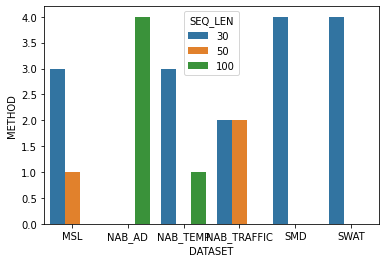

In [ ]:
import seaborn as sns
sns.barplot(data=max_f1_df.groupby(['DATASET', 'SEQ_LEN']).count().reset_index(), x='DATASET', y="METHOD", hue="SEQ_LEN")

In [ ]:
max_f1_df.groupby(['DATASET', 'SEQ_LEN']).count()

METHOD  MAX_F1  THRESHOLD
DATASET     SEQ_LEN                           
MSL         30            3       3          3
            50            1       1          1
NAB_AD      100           4       4          4
NAB_TEMP    30            3       3          3
            100           1       1          1
NAB_TRAFFIC 30            2       2          2
            50            2       2          2
SMD         30            4       4          4
SWAT        30            4       4          4

In [ ]:
import pandasql as ps
q = """SELECT "METHOD", "DATASET", "SEQ_LEN" ,MAX("True-f1") AS MAX_F1, "THRESHOLD" 
       FROM means_seed
       GROUP BY "METHOD","DATASET" """

ps.sqldf(q)

,METHOD,DATASET,SEQ_LEN,MAX_F1,THRESHOLD
0,DEEPANT,MSL,50,0.509279,0.8
1,DEEPANT,NAB_AD,100,0.506667,0.3
2,DEEPANT,NAB_TEMP,30,0.637433,0.7
3,DEEPANT,NAB_TRAFFIC,30,0.901805,0.8
4,DEEPANT,SMD,30,0.309344,0.6
5,DEEPANT,SWAT,30,0.796572,0.6
6,TANOGAN,MSL,30,0.458484,0.6
7,TANOGAN,NAB_AD,100,0.666667,0.8
8,TANOGAN,NAB_TEMP,30,0.879070,0.5
9,TANOGAN,NAB_TRAFFIC,50,0.800000,0.8


In [ ]:
means_seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SEQ_LEN             21 non-null     int64  
 1   THRESHOLD           21 non-null     float64
 2   SEED                21 non-null     float64
 3   True-f1             21 non-null     float64
 4   weighted-f1         21 non-null     float64
 5   accuracy            21 non-null     float64
 6   true_recall         21 non-null     float64
 7   true_precision      21 non-null     float64
 8   weighted_recall     21 non-null     float64
 9   weighted_precision  21 non-null     float64
 10  epoch_time          21 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.9 KB


Nel setting proposto abbiamo molteplici punti di vista da cui analizzare i risultati ottenuti. La discussione dei risultati presentati sarà quindi guidata dalle seguenti domande: 
- Dato un dataset, è possibile stabilire 

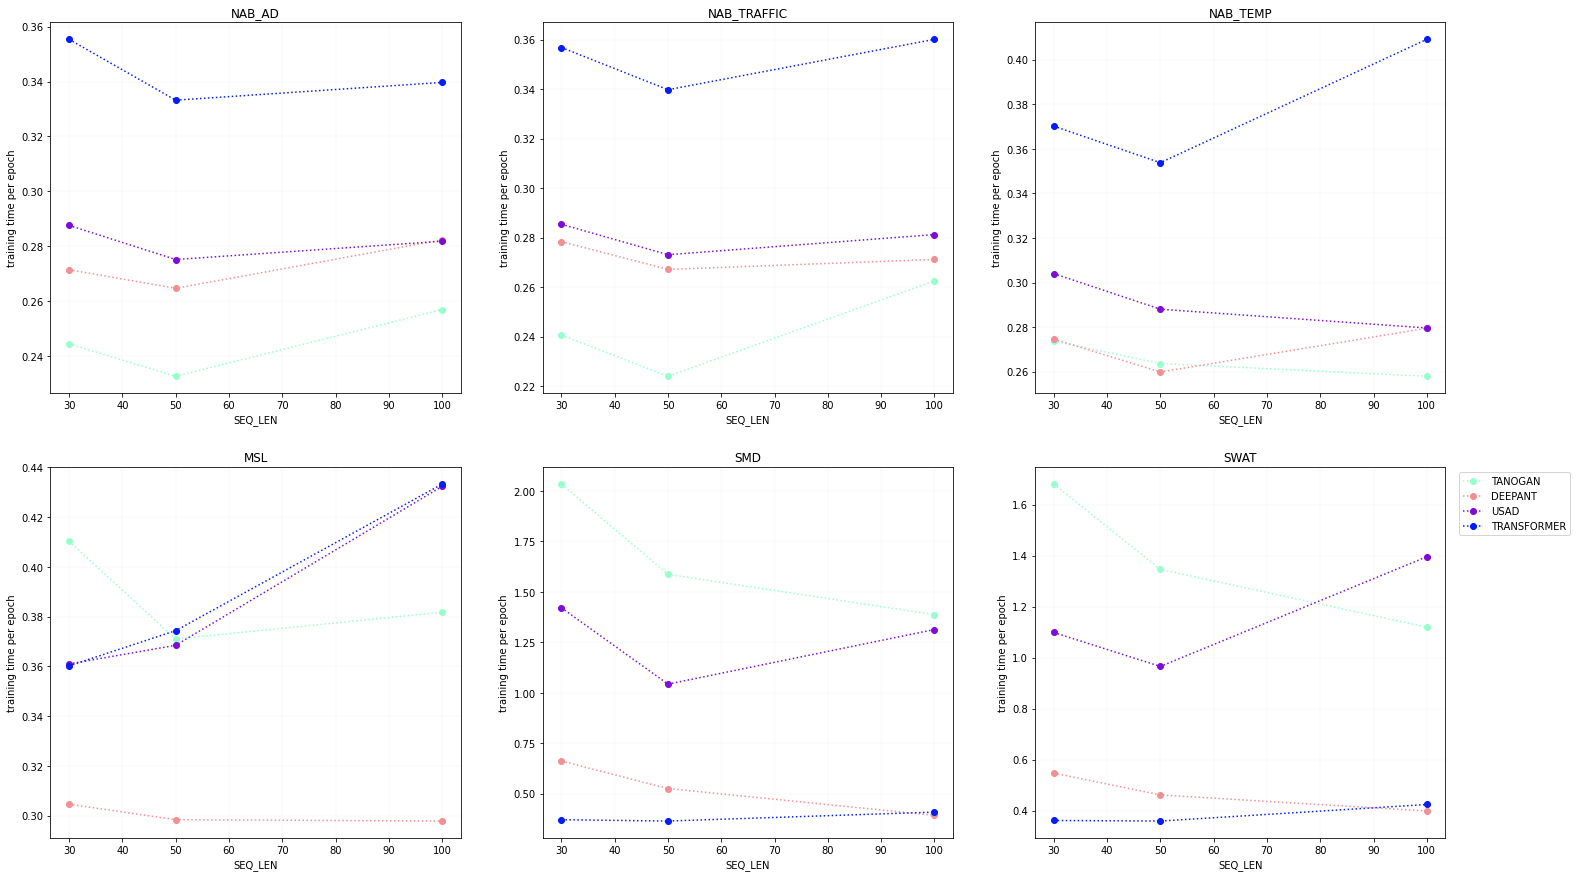

In [ ]:
lengths = excel['SEQ_LEN'].unique()
methods = excel['METHOD'].unique()
datasets = excel['DATASET'].unique()
styles = ["-", "--", ":"]
colors = ["#98ffcc", "#f28f93", "#7e0cd6", "#041cf6", "#ffff31", "#424957"]

fig, axs = plt.subplots(2, 3, figsize=(25,15))
for i,d in enumerate(datasets):
  for j,m in enumerate(methods):
    means = excel[(excel['METHOD'] == m) & (excel['DATASET']==d)].groupby(['SEQ_LEN']).mean().reset_index()
    axs.flat[i].plot(means['SEQ_LEN'],
              means['epoch_time'],
              label=m, 
              color=colors[j], 
              linestyle=styles[2],
              marker='o')
    axs.flat[i].grid(color='lightgrey', linestyle='-', linewidth=0.1)
    axs.flat[i].set_title("{}".format(d))
    axs.flat[i].set(xlabel="SEQ_LEN",ylabel="training time per epoch")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()


In [ ]:
for d in datasets:
  points={
      'DEEPANT':0,
      'TANOGAN':0,
      'USAD':0,
      'TRANSFORMER':0
  }
  points_wtime={
      'DEEPANT':0,
      'TANOGAN':0,
      'USAD':0,
      'TRANSFORMER':0
  }
  for l in lengths:
    data = excel[(excel['DATASET']==d) & (excel['SEQ_LEN']==l)].groupby('METHOD').max()['True-f1'].reset_index().sort_values('True-f1')
    time = excel[(excel['DATASET']==d) & (excel['SEQ_LEN']==30)].groupby('METHOD').max()['epoch_time'].reset_index().sort_values('epoch_time', ascending=False)
    for i,el in enumerate(data['METHOD']):
      points[el] += i
      points_wtime[el] += i
    for i,el in enumerate(time['METHOD']):
      points_wtime[el] += i/4
  print("------- {} -------".format(d))
  print("Best w/o time: {}".format(max(points, key=points.get)))
  print("Best w/ time: {}".format(max(points_wtime, key=points_wtime.get)))
  print()
  print()

------- NAB_AD -------
Best w/o time: TRANSFORMER
Best w/ time: USAD


------- NAB_TRAFFIC -------
Best w/o time: USAD
Best w/ time: USAD


------- NAB_TEMP -------
Best w/o time: USAD
Best w/ time: USAD


------- MSL -------
Best w/o time: DEEPANT
Best w/ time: DEEPANT


------- SMD -------
Best w/o time: DEEPANT
Best w/ time: DEEPANT


------- SWAT -------
Best w/o time: TRANSFORMER
Best w/ time: TRANSFORMER


